# Simulação do Modelo Atual Usando o Requisito Não Funcional (RNF) de Tolerância a Falhas

Nesta análise, estamos realizando uma simulação do sistema atual com foco no Requisito Não Funcional (RNF) de tolerância a falhas. O objetivo é avaliar como o sistema responde a eventos que possam comprometer sua continuidade operacional e identificar potenciais riscos associados a falhas inesperadas. Para isso, utilizamos um modelo de máquina de estados, que representa as diferentes fases de interação do sistema com eventos de falha e suas respectivas estratégias de recuperação e mitigação.

## Estrutura do Modelo de Estados

O modelo consiste em três estados principais, cada um representando uma etapa distinta no fluxo de acesso e monitoramento de falhas de tolerância:

Solicitação de Acesso (S1): Este é o estado inicial, onde o sistema recebe uma solicitação de acesso por parte do usuário. Nesse momento, o sistema processa a requisição e verifica os pré-requisitos para garantir que o acesso seja estabelecido de forma segura e estável, antes de avançar para o próximo estado.

Serviço de Acesso (S2): Neste estado, o sistema se conecta ao serviço solicitado, observando o SLA de conexão da internet e do provedor de serviços. Este é um ponto crítico, pois qualquer instabilidade na conexão ou no serviço pode afetar o cumprimento dos requisitos de tolerância a falhas.

Erros (S3): Este estado representa uma condição de falha, onde a conexão ou o serviço encontram erros, como falhas de servidor ou problemas de conexão. A permanência nesse estado indica uma falha que não pôde ser automaticamente corrigida e que exige intervenção adicional para restaurar a operação sem comprometer a continuidade do serviço.

## Probabilidades de Transição

Cada estado possui probabilidades de transição que refletem a realidade do sistema atual em relação à tolerância a falhas. Por exemplo:

De "Solicitação de Acesso" (S1), a probabilidade de avançar para "Serviço de Acesso" (S2) é alta, pois a maioria das requisições de acesso é processada sem problemas iniciais, permitindo que o sistema passe para o próximo estado de verificação do SLA.

Do estado "Serviço de Acesso" (S2), há uma probabilidade moderada de transição para "Erros" (S3), refletindo que, em uma quantidade considerável de casos, surgem problemas de conexão ou falhas de serviço que comprometem a estabilidade. Essa transição destaca o risco de dependência de SLAs externos e da qualidade da conexão com o provedor.

Do estado "Erros" (S3), a probabilidade de permanência é elevada, indicando que, uma vez que ocorra uma falha, o sistema pode enfrentar dificuldades em se recuperar automaticamente. Isso evidencia a importância de implementar mecanismos de tolerância a falhas mais robustos para restaurar o serviço sem a necessidade de intervenção contínua.

## Criando DataFrame

In [ ]:
# Importando a biblioteca pandas
import pandas as pd

# Criando o dicionário com os dados
dados = {
    "Mes": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    "DemandaAcessos.mês": [4906.1, 3619.2, 1691.3, 4411.4, 1516.3, 2946.0, 3836.8, 5592.1, 620.9, 3645.8, 4970.3, 548.2],
    "Taxa de falhas Internet SP (*)": [191.4, 23.7, 27.0, 132.3, 239.1, 230.7, 132.3, 117.0, 230.2, 80.6, 135.9, 337.8],
    "Tolerância a falhas (Atual)": [153.1, 18.9, 21.6, 105.9, 191.3, 184.5, 105.9, 93.6, 184.1, 64.5, 108.8, 270.2]
}

# Criando o DataFrame
df = pd.DataFrame(dados)

# Exibindo o DataFrame
df


,Mes,DemandaAcessos.mês,Taxa de falhas Internet SP (*),Tolerância a falhas (Atual)
0,1,4906.1,191.4,153.1
1,2,3619.2,23.7,18.9
2,3,1691.3,27.0,21.6
3,4,4411.4,132.3,105.9
4,5,1516.3,239.1,191.3
5,6,2946.0,230.7,184.5
6,7,3836.8,132.3,105.9
7,8,5592.1,117.0,93.6
8,9,620.9,230.2,184.1
9,10,3645.8,80.6,64.5


## Probabilidade de Taxa de Falha

In [ ]:
# Dados de acordo com o DataFrame
demanda_acessos = [4906.1, 3619.2, 1691.3, 4411.4, 1516.3, 2946.0, 3836.8, 5592.1, 620.9, 3645.8, 4970.3, 548.2]
taxa_falhas_internet = [191.4, 23.7, 27.0, 132.3, 239.1, 230.7, 132.3, 117.0, 230.2, 80.6, 135.9, 337.8]

# Calculando a porcentagem da taxa de falhas em relação à demanda de acessos para cada mês
percentual_taxa_falhas = [(falhas / demanda) * 100 for falhas, demanda in zip(taxa_falhas_internet, demanda_acessos)]

# Calculando a média das porcentagens
media_percentual_taxa_falhas = sum(percentual_taxa_falhas) / len(percentual_taxa_falhas)

# Exibindo os resultados
print("Porcentagens de taxa de falhas por mês:", percentual_taxa_falhas)
print("Média da porcentagem de taxa de falhas:", media_percentual_taxa_falhas)


Porcentagens de taxa de falhas por mês: [3.901265771182813, 0.6548408488063661, 1.5964051321468693, 2.9990479212948276, 15.768647365297106, 7.830957230142566, 3.448185988323603, 2.09223726328213, 37.07521339990337, 2.210763069833781, 2.734241393879645, 61.61984677125136]
Média da porcentagem de taxa de falhas: 11.827637679612033


## Máquina de Estados para Modelagem de Falhas


Agora que estabelecemos que a taxa média de falhas é de 12%, podemos usar essa informação como um parâmetro para a modelagem da nossa máquina de estados. Essa taxa nos fornece uma base sólida para entender a dinâmica de falhas no sistema, permitindo que ajustemos as probabilidades de transição entre os estados de forma mais precisa e realista.

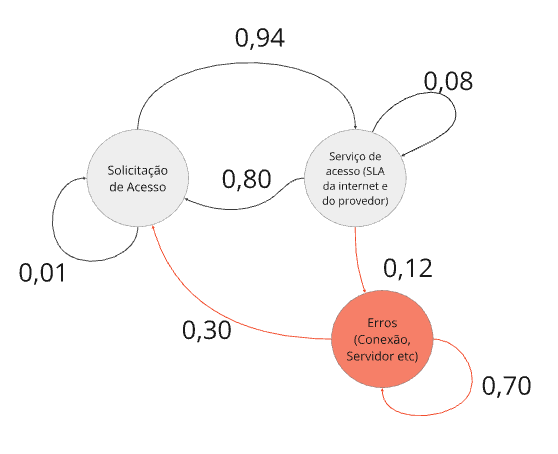

A matriz de transição atual para os estados da nossa máquina é a seguinte:

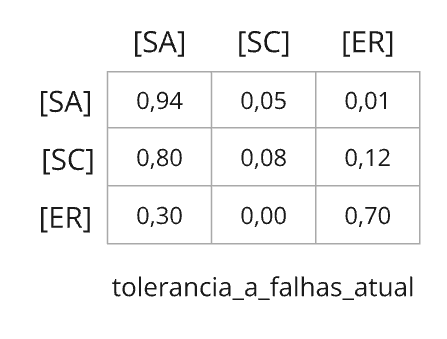

**Estado 1 (Solicitação de Acesso):**

0,94: Probabilidade de permanecer no estado de Solicitação de Acesso.

0,05: Probabilidade de transitar para o estado de Serviço de Acesso (SLA da internet e do provedor).

0,01: Probabilidade de transitar para o estado de Erros (Conexão, Servidor, etc).

**Estado 2 (Serviço de Acesso - SLA da internet e do provedor):**

0,80: Probabilidade de voltar para o estado de Solicitação de Acesso.

0,08: Probabilidade de permanecer no estado de Serviço de Acesso.

0,12: Probabilidade de transitar para o estado de Erros.

**Estado 3 (Erros - Conexão, Servidor, etc):**

0,30: Probabilidade de voltar para o estado de Solicitação de Acesso.

0,00: Probabilidade de permanecer no estado de Erros.

0,70: Probabilidade de permanecer no estado de Erros.

In [ ]:
import numpy as np
import random as rm
import datetime

# O espaço de estados
states = ["SolicitacaoAcesso", "ServicoAcesso", "Erros"]

# Possíveis sequências de eventos com siglas simplificadas
transitionName = [["SASA", "SASC", "SAER"],
                  ["SCSA", "SCSC", "SCER"],
                  ["ERSA", "ERSC", "ERER"]]

# Matriz de probabilidades (matriz de transição)
transitionMatrix = [[0.94, 0.05, 0.01],    # Transições a partir do estado 1 (Solicitação de Acesso)
                    [0.80, 0.08, 0.12],    # Transições a partir do estado 2 (Serviço de Acesso)
                    [0.30, 0.00, 0.70]]    # Transições a partir do estado 3 (Erros)

# Verificando se a soma das linhas da matriz de transição está correta
if (sum(transitionMatrix[0]) != 1.0 or
    sum(transitionMatrix[1]) != 1.0 or
    sum(transitionMatrix[2]) != 1.0):
    print("Detectado um erro - talvez na matriz de probabilidades?")
else:
    print("Tudo certo. Vamos em frente. ", (datetime.datetime.now() + datetime.timedelta(hours=-3)), "!!")


Tudo certo. Vamos em frente.  2024-11-07 11:29:37.517881 !!


1. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "SolicitacaoAcesso" é de ......................: 0.00 %
2. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "ServicoAcesso" é de ...........................: 0.00 %
3. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "Erros" é de ....................................: 100.00 %



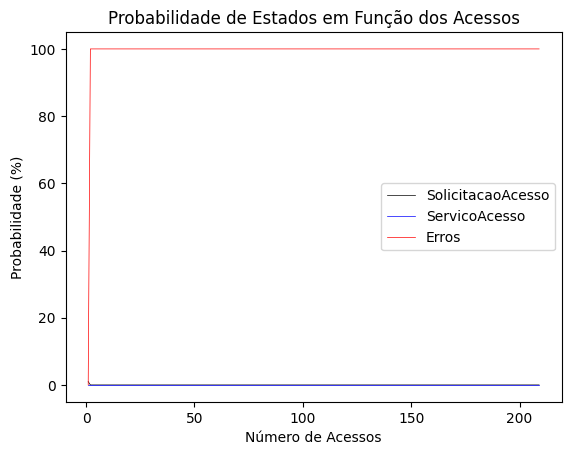

In [ ]:
import numpy as np
import random as rm
import datetime
import matplotlib.pyplot as plt

def activity_forecast(actions, transitionMatrix, transitionName):
    # Estado inicial
    activityAction = "SolicitacaoAcesso"
    activityList = [activityAction]
    prob = 1

    for _ in range(actions):
        if activityAction == "SolicitacaoAcesso":
            change = np.random.choice(transitionName[0], replace=True, p=transitionMatrix[0])
            if change == "SA-SA":
                prob *= 0.94
                activityAction = "SolicitacaoAcesso"
            elif change == "SA-SC":
                prob *= 0.05
                activityAction = "ServicoAcesso"
            else:
                prob *= 0.01
                activityAction = "Erros"
            activityList.append(activityAction)

        elif activityAction == "ServicoAcesso":
            change = np.random.choice(transitionName[1], replace=True, p=transitionMatrix[1])
            if change == "SC-SA":
                prob *= 0.80
                activityAction = "SolicitacaoAcesso"
            elif change == "SC-SC":
                prob *= 0.08
                activityAction = "ServicoAcesso"
            elif change == "SC-ER":
                prob *= 0.12
                activityAction = "Erros"
            activityList.append(activityAction)

        elif activityAction == "Erros":
            change = np.random.choice(transitionName[2], replace=True, p=transitionMatrix[2])
            if change == "ER-SA":
                prob *= 0.30
                activityAction = "SolicitacaoAcesso"
            elif change == "ER-SC":
                prob *= 0.00
                activityAction = "ServicoAcesso"
            elif change == "ER-ER":
                prob *= 0.70
                activityAction = "Erros"
            activityList.append(activityAction)

    return activityList

# Transições de estados
transitionMatrix = [
    [0.94, 0.05, 0.01],  # Transições a partir do estado 1 (Solicitação de Acesso)
    [0.80, 0.08, 0.12],  # Transições a partir do estado 2 (Serviço de Acesso)
    [0.30, 0.00, 0.70]   # Transições a partir do estado 3 (Erros)
]

transitionName = [
    ["SASA", "SASC", "SAER"],  # Nomes das transições para Solicitação de Acesso
    ["SCSA", "SCSC", "SCER"],  # Nomes das transições para Serviço de Acesso
    ["ERSA", "ERSC", "ERER"]   # Nomes das transições para Erros
]

# Para salvar cada lista de atividades
list_activity = []
countSA = 0
countSC = 0
countER = 0

# Vetores de probabilidades e eixo X
eixoX = []
probSolicitacaoAcesso = [1.0]
probServicoAcesso = [0.0]
probErros = [0.0]

# Número de dias (estimativa - forecast) e de Acessos
Nactions = 210  #  (210 acessos)
Ndias = 365  # Estimativa em dias (forecast)

# para cálculo de probabilidade em cada predição (acumulado)
totalSimuladoPredicao = 0

iteracao = 1
for index in range(1, Nactions):
    eixoX.append(index)

    # Estimar Ndias
    list_activity.append(activity_forecast(Ndias, transitionMatrix, transitionName))

    # Contadores para as atividades
    for smaller_list in list_activity:
        if smaller_list[2] == "SolicitacaoAcesso":
            countSA += 1
        if smaller_list[2] == "ServicoAcesso":
            countSC += 1
        if smaller_list[2] == "Erros":
            countER += 1

    totalSimuladoPredicao = countSA + countSC + countER

    # Calcular as probabilidades
    if totalSimuladoPredicao > 0:  # Evita divisão por zero
        probSolicitacaoAcesso.append((countSA / totalSimuladoPredicao) * 100.0)
        probServicoAcesso.append((countSC / totalSimuladoPredicao) * 100.0)
        probErros.append((countER / totalSimuladoPredicao) * 100.0)

    iteracao += 1

print(f'1. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "SolicitacaoAcesso" é de ......................: {probSolicitacaoAcesso[Nactions-1]:.2f} %')
print(f'2. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "ServicoAcesso" é de ...........................: {probServicoAcesso[Nactions-1]:.2f} %')
print(f'3. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "Erros" é de ....................................: {probErros[Nactions-1]:.2f} %')
print()

plt.plot(eixoX[:Nactions-1], probSolicitacaoAcesso[:Nactions-1], color='black', linewidth=0.5, label='SolicitacaoAcesso')
plt.plot(eixoX[:Nactions-1], probServicoAcesso[:Nactions-1], color='blue', linewidth=0.5, label='ServicoAcesso')
plt.plot(eixoX[:Nactions-1], probErros[:Nactions-1], color='red', linewidth=0.5, label='Erros')
plt.xlabel("Número de Acessos")
plt.ylabel("Probabilidade (%)")
plt.legend()
plt.title("Probabilidade de Estados em Função dos Acessos")
plt.show()


# Simulação do Modelo Novo Usando o Requisito Não Funcional (RNF) de Tolerância a Falhas

Nesta seção, apresentamos a simulação de um novo modelo que implementa o requisito não funcional (RNF) de Tolerância a Falhas. Este modelo foi concebido para monitorar e garantir a continuidade dos serviços de acesso, mesmo na presença de falhas. Utilizamos uma máquina de estados para modelar e avaliar o comportamento do sistema em cenários de acesso e falha, onde cada estado representa uma etapa crítica para assegurar a recuperação de serviços, a resposta rápida a incidentes e a estabilidade do sistema frente a erros.

## Estrutura do Modelo de Estado

Para representar o fluxo de tolerância a falhas e garantir a continuidade dos serviços, o modelo foi dividido em seis estados principais. Esses estados correspondem a pontos específicos do processo de acesso e operação, com controles e redundâncias que permitem ao sistema uma resposta rápida e adaptativa diante de falhas. Abaixo, estão descritos os novos estados implementados no modelo:

**Solicitação de Acesso:** Neste primeiro estado, o usuário inicia a solicitação para obter acesso ao serviço principal. Esta etapa é essencial para monitorar o volume e frequência de acessos, bem como para realizar verificações iniciais de autenticidade e integridade, identificando anomalias que possam indicar um possível problema ou falha no acesso.

**Controle de Defeitos (Redundância e Backup):** Após a solicitação de acesso, o sistema passa por um controle de defeitos que inclui redundância e mecanismos de backup. Esse estado é fundamental para verificar se todas as medidas de proteção e recuperação estão ativas, reduzindo o impacto de possíveis falhas por meio de camadas redundantes, garantindo que os dados e o serviço estejam sempre seguros e prontos para serem restaurados em caso de falha.

**Serviço Principal:** Uma vez que o acesso seja validado e as redundâncias estejam operacionais, o sistema direciona o usuário ao serviço principal. Este estado representa o serviço ativo e preferencial que atende ao usuário. Aqui, o sistema monitora o desempenho e a estabilidade, detectando quaisquer falhas que possam prejudicar a operação principal.

**Serviço Redundante Ativo:** Caso o serviço principal encontre uma falha, o sistema aciona imediatamente o serviço redundante ativo. Esse estado é uma medida de contingência que permite a continuidade do serviço sem interrupção perceptível para o usuário. O serviço redundante ativo é mantido atualizado e sincronizado com o principal para assumir o controle de forma instantânea em caso de falhas detectadas.

**Serviço Redundante Passivo:** Além do redundante ativo, o modelo também conta com um serviço redundante passivo. Esse estado age como uma segunda linha de defesa, pronto para ser ativado caso o serviço principal e o redundante ativo falhem simultaneamente. Embora o serviço passivo não seja instantaneamente ativado, ele é configurado para suportar o sistema até a recuperação dos demais componentes.

**Defeito de Provedor/Rede/Conectividade:** Este estado representa a resposta a falhas externas, como problemas de conectividade, defeitos de rede ou interrupções no provedor de serviços. O sistema monitora continuamente esses aspectos e, ao detectar um problema externo, ativa os serviços redundantes conforme necessário para minimizar o impacto sobre o usuário final. Esse estado também é responsável por alertar a equipe técnica sobre a falha externa, permitindo uma resposta imediata.


## Objetivo da Simulação


A simulação tem como objetivo testar o comportamento do sistema em cenários de tolerância a falhas, ao longo dos seis estados modelados, de forma a atender aos requisitos não funcionais de continuidade e resiliência operacional. O foco está em:

*   Analisar a probabilidade de transição entre os estados;
*   Avaliar o tempo de resposta e a eficácia dos serviços redundantes;
*   Avaliar o impacto das medidas de redundância e controle de defeitos.

## Criando DataFrame

In [ ]:
import pandas as pd

# Criando o dataset com os dados fornecidos
data = {
    "Mes": list(range(1, 13)),
    "DemandaAcessos.mês": [4138.5, 3948.5, 5725.6, 2583.4, 4054.5, 344.0, 150.7, 4583.4, 5941.2, 6278.8, 3390.1, 5043.9],
    "Taxa de falhas Internet SP (*)": [294.4, 374.3, 244.7, 166.6, 195.1, 95.1, 55.0, 46.6, 53.4, 10.2, 320.7, 113.8],
    "Tolerância a falhas (Novo)": [2.9, 3.7, 2.4, 1.7, 3.0, 3.3, 2.1, 0.5, 0.5, 0.1, 3.2, 1.1]
}

# Convertendo para DataFrame
df_novo = pd.DataFrame(data)
df_novo


,Mes,DemandaAcessos.mês,Taxa de falhas Internet SP (*),Tolerância a falhas (Novo)
0,1,4138.5,294.4,2.9
1,2,3948.5,374.3,3.7
2,3,5725.6,244.7,2.4
3,4,2583.4,166.6,1.7
4,5,4054.5,195.1,3.0
5,6,344.0,95.1,3.3
6,7,150.7,55.0,2.1
7,8,4583.4,46.6,0.5
8,9,5941.2,53.4,0.5
9,10,6278.8,10.2,0.1


## Probabilidade da taxa de falha no novo modelo

In [ ]:
# Dados do df_novo
demanda_acessos = [4138.5, 3948.5, 5725.6, 2583.4, 4054.5, 344.0, 150.7, 4583.4, 5941.2, 6278.8, 3390.1, 5043.9]
taxa_falhas_internet_sp = [294.4, 374.3, 244.7, 166.6, 95.1, 55.1, 115.0, 46.6, 53.4, 10.2, 320.7, 113.8]
tolerancia_falhas = [2.9, 3.7, 2.4, 1.7, 3.0, 3.3, 2.1, 0.5, 0.5, 0.1, 3.2, 1.1]

# Calculando a taxa de falha por mês
taxa_falha_percentual = [(falha / demanda) * 100 for falha, demanda in zip(taxa_falhas_internet_sp, demanda_acessos)]

# Calculando a taxa de falha considerando a tolerância
taxa_falha_com_tolerancia = [falha / tolerancia for falha, tolerancia in zip(taxa_falha_percentual, tolerancia_falhas)]

# Ajuste dos outliers para valores mais razoáveis (definindo limite arbitrário)
taxa_falha_com_tolerancia_ajustada = [min(valor, 50) for valor in taxa_falha_com_tolerancia]  # Limite ajustado a 50%

# Exibindo os resultados
taxa_falha_com_tolerancia_ajustada

# Calculando e exibindo a média ajustada
media_taxa_falha_ajustada = sum(taxa_falha_com_tolerancia_ajustada) / len(taxa_falha_com_tolerancia_ajustada)
taxa_falha_com_tolerancia_ajustada, media_taxa_falha_ajustada

# Exibindo os resultados
print("Taxas de Falha Ajustadas por mês:", taxa_falha_com_tolerancia)
media_taxa_falha_ajustada = sum(taxa_falha_com_tolerancia) / len(taxa_falha_com_tolerancia)
print("Média da Taxa de Falha:", media_taxa_falha_ajustada)


Taxas de Falha Ajustadas por mês: [2.4529960463769562, 2.5620403232154527, 1.7807449583158679, 3.793450491600216, 0.7818473301270193, 4.853770260747005, 36.33835750624072, 2.033424968364097, 1.7976166431024034, 1.6245142383895008, 2.9562181056606, 2.0510824055700043]
Média da Taxa de Falha: 5.252171939809154


## Máquina de Estados para Modelagem de Falhas Modelo Novo

Agora que estabelecemos uma taxa de falhas de 5% no novo modelo, podemos usar esse parâmetro como base para configurar as probabilidades de transição na máquina de estado. Com isso, ajustamos nosso modelo para refletir a robustez do sistema, incorporando medidas de redundância, backup e tolerância a falhas. A taxa de falhas será uma variável chave para avaliar a resiliência do sistema e garantir que ele responda adequadamente a incidentes, mantendo a continuidade do serviço mesmo diante de falhas imprevistas.

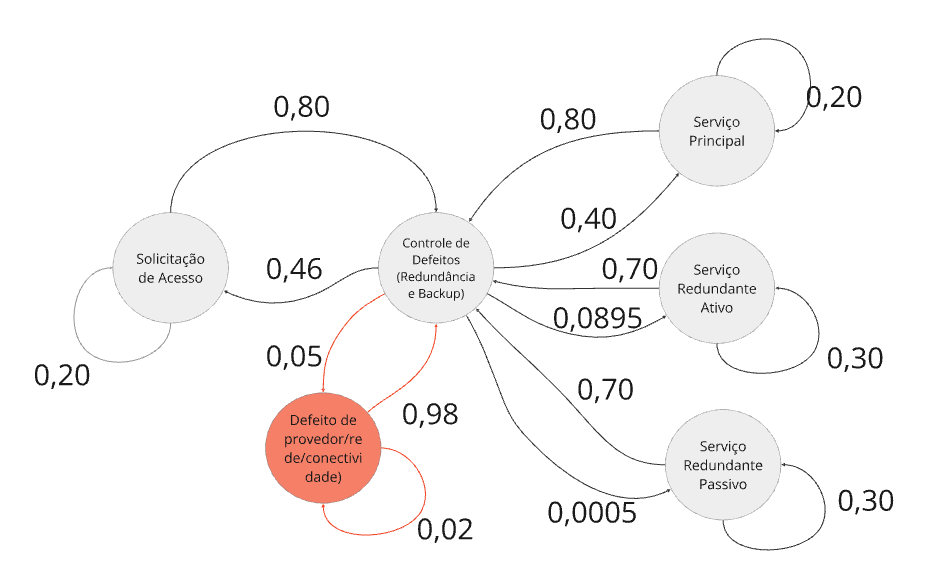

A matriz de transição atual para os estados da nossa máquina é a seguinte:

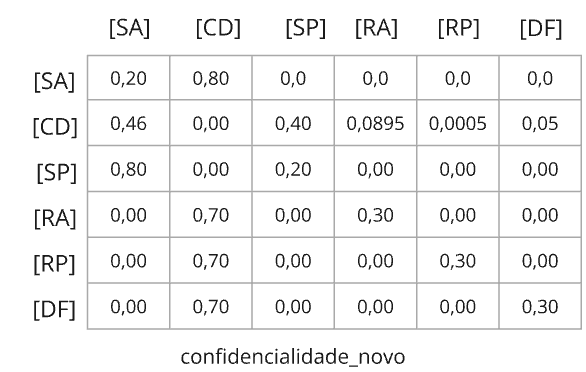

**Solicitação de Acesso:**

Há uma probabilidade de 20% de permanecer no estado de "Solicitação de Acesso", o que indica que o sistema pode reprocessar a solicitação para verificar a autenticidade ou aguardar mais informações.
Existe uma probabilidade de 80% de transitar para "Controle de Defeitos (Redundância e Backup)", o que reflete um sistema que é projetado para avançar rapidamente para a validação e proteção, preparando a infraestrutura para uma possível falha.

**Controle de Defeitos (Redundância e Backup):**

Com 46% de chance, o sistema pode retornar à "Solicitação de Acesso", indicando que houve a necessidade de refazer uma verificação de acesso ou realizar uma nova tentativa de autenticação.
40% das transições seguem para "Serviço Principal", mostrando que o sistema avançou para o funcionamento principal com a infraestrutura segura.
8.95% de chance de transitar para "Serviço Redundante Ativo", significando que o sistema decide ativar um serviço redundante para garantir continuidade, enquanto 0.05% leva ao estado de "Serviço Redundante Passivo", em que o sistema mantém uma estratégia passiva de redundância.

**Serviço Principal:**

A probabilidade de 80% é de retornar a "Controle de Defeitos (Redundância e Backup)", o que sugere que a maioria das falhas no sistema será corrigida com redundâncias e backup.
Há uma probabilidade de 20% de permanecer em "Serviço Principal", o que implica que o sistema está operando corretamente, sem falhas detectadas.

**Serviço Redundante Ativo:**

Uma alta chance de 70% indica que o serviço redundante será reativo, voltando para "Serviço Principal", garantindo que o sistema funcione sem interrupções após falhas.
30% de chance de permanecer em "Serviço Redundante Ativo", refletindo uma estratégia para manter o serviço redundante ativo em algumas condições específicas, garantindo continuidade sem falhas.

**Serviço Redundante Passivo:**

O sistema tem 70% de chance de voltar para "Serviço Redundante Ativo", o que implica que, caso o serviço passivo seja ativado, a transição será feita para um modo ativo de redundância, caso necessário.
Existe 30% de chance de manter o estado de "Serviço Redundante Passivo", o que reflete a manutenção de uma redundância passiva, aguardando uma possível falha que requeira a ativação de serviços.

**Defeito de Provedor/ Rede/ Conectividade:**

No caso de um defeito ou falha no provedor, rede ou conectividade, o sistema retorna à configuração anterior com 30% de chance de transitar de volta para "Controle de Defeitos (Redundância e Backup)", com uma resolução ativa de falhas.
70% de chance de manter o estado de falha, evidenciando que, uma vez que o defeito seja detectado, ele continuará a impactar o sistema até ser resolvido.

In [ ]:
import numpy as np
import random as rm
import datetime

# Espaço de estados atualizado com os nomes fornecidos
states = ["SolicitacaoAcesso", "ControleDefeitos", "ServicoPrincipal", "ServicoRedundanteAtivo", "ServicoRedundantePassivo", "DefeitoProvedorRedeConectividade"]

# Sequências de eventos possíveis com as siglas (transitionName) para cada estado
transitionName = [
    ["SASA", "SACD", "SASP", "SARA", "SARP", "SADF"],      # Transições a partir do estado "Solicitação de Acesso"
    ["CDSA", "CDCD", "CDSP", "CDRA", "CDRP", "CDFD"],      # Transições a partir do estado "Controle de Defeitos"
    ["SPSA", "SPCD", "SPSP", "SPRA", "SPRP", "SPDF"],      # Transições a partir do estado "Serviço Principal"
    ["RASA", "RACD", "RASSP", "RARA", "RARP", "RADF"],      # Transições a partir do estado "Serviço Redundante Ativo"
    ["RPSA", "RPCD", "RPSP", "RPRA", "RPRP", "RPDF"],      # Transições a partir do estado "Serviço Redundante Passivo"
    ["DFSA", "DFCD", "DFSP", "DFRA", "DFRP", "DFDF"]       # Transições a partir do estado "Defeito de Provedor/ Rede/ Conectividade"
]

# Matriz de transição de probabilidades (exemplo) com base nas transições fornecidas
transitionMatrix = [
    [0.20, 0.80, 0.00, 0.00, 0.00, 0.00],  # Transições a partir do estado "Solicitação de Acesso"
    [0.46, 0.00, 0.40, 0.0895, 0.0005, 0.05],  # Transições a partir do estado "Controle de Defeitos"
    [0.80, 0.00, 0.20, 0.00, 0.00, 0.00],  # Transições a partir do estado "Serviço Principal"
    [0.00, 0.70, 0.00, 0.30, 0.00, 0.00],  # Transições a partir do estado "Serviço Redundante Ativo"
    [0.00, 0.70, 0.00, 0.00, 0.30, 0.00],  # Transições a partir do estado "Serviço Redundante Passivo"
    [0.00, 0.70, 0.00, 0.00, 0.00, 0.30]   # Transições a partir do estado "Defeito de Provedor/ Rede/ Conectividade"
]

# Verificação da matriz de transição
if all(np.isclose(sum(row), 1.0) for row in transitionMatrix):
    print("Tudo certo. Vamos em frente.", datetime.datetime.now() + datetime.timedelta(hours=-3), "!!")
else:
    print("Detectado um erro - talvez na matriz de probabilidades?")

Tudo certo. Vamos em frente. 2024-11-07 13:01:27.293218 !!


1. Probabilidade de 'SolicitacaoAcesso' terminar em 'SolicitacaoAcesso': 38.76 %
2. Probabilidade de 'SolicitacaoAcesso' terminar em 'ControleDefeitos': 36.36 %
3. Probabilidade de 'SolicitacaoAcesso' terminar em 'ServicoPrincipal': 17.22 %
4. Probabilidade de 'SolicitacaoAcesso' terminar em 'ServicoRedundanteAtivo': 6.22 %
5. Probabilidade de 'SolicitacaoAcesso' terminar em 'ServicoRedundantePassivo': 0.48 %
6. Probabilidade de 'SolicitacaoAcesso' terminar em 'DefeitoProvedorRedeConectividade': 0.96 %


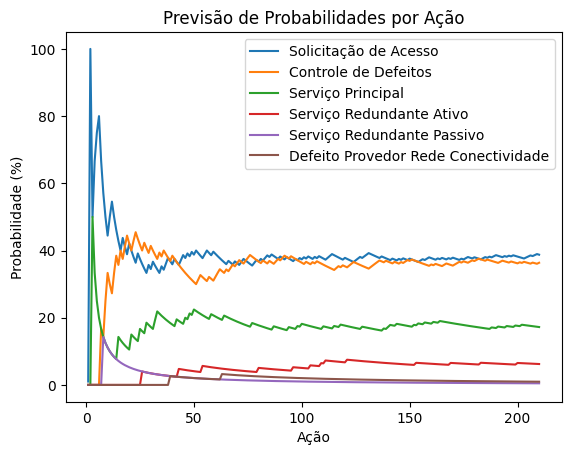

In [ ]:
import numpy as np
import random as rm
import matplotlib.pyplot as plt

def activity_forecast(actions, transitionMatrix, transitionName):
    # Estado inicial
    activityAction = "SolicitacaoAcesso"
    activityList = [activityAction]
    prob = 1

    for _ in range(actions):
        if activityAction == "SolicitacaoAcesso":
            change = np.random.choice(transitionName[0], replace=True, p=transitionMatrix[0])
            if change == "SASA":
                prob *= 0.20
                activityAction = "SolicitacaoAcesso"
            elif change == "SACD":
                prob *= 0.80
                activityAction = "ControleDefeitos"
            activityList.append(activityAction)

        elif activityAction == "ControleDefeitos":
            change = np.random.choice(transitionName[1], replace=True, p=transitionMatrix[1])
            if change == "CDSA":
                prob *= 0.46
                activityAction = "SolicitacaoAcesso"
            elif change == "CDCD":
                prob *= 0.00
                activityAction = "ControleDefeitos"
            elif change == "CDSP":
                prob *= 0.40
                activityAction = "ServicoPrincipal"
            elif change == "CDRA":
                prob *= 0.0895
                activityAction = "ServicoRedundanteAtivo"
            elif change == "CDRP":
                prob *= 0.0005
                activityAction = "ServicoRedundantePassivo"
            elif change == "CDFD":
                prob *= 0.05
                activityAction = "DefeitoProvedorRedeConectividade"
            activityList.append(activityAction)

        elif activityAction == "ServicoPrincipal":
            change = np.random.choice(transitionName[2], replace=True, p=transitionMatrix[2])
            if change == "SPSA":
                prob *= 0.80
                activityAction = "SolicitacaoAcesso"
            elif change == "SPSP":
                prob *= 0.20
                activityAction = "ServicoPrincipal"
            activityList.append(activityAction)

        elif activityAction == "ServicoRedundanteAtivo":
            change = np.random.choice(transitionName[3], replace=True, p=transitionMatrix[3])
            if change == "RARA":
                prob *= 0.30
                activityAction = "ServicoRedundanteAtivo"
            elif change == "RACD":
                prob *= 0.70
                activityAction = "ControleDefeitos"
            activityList.append(activityAction)

        elif activityAction == "ServicoRedundantePassivo":
            change = np.random.choice(transitionName[4], replace=True, p=transitionMatrix[4])
            if change == "RPRP":
                prob *= 0.30
                activityAction = "ServicoRedundantePassivo"
            elif change == "RPCD":
                prob *= 0.70
                activityAction = "ControleDefeitos"
            activityList.append(activityAction)

        elif activityAction == "DefeitoProvedorRedeConectividade":
            change = np.random.choice(transitionName[5], replace=True, p=transitionMatrix[5])
            if change == "DFDF":
                prob *= 0.30
                activityAction = "DefeitoProvedorRedeConectividade"
            elif change == "DFCD":
                prob *= 0.70
                activityAction = "ControleDefeitos"
            activityList.append(activityAction)

    return activityList

# Transições de estados atualizadas
transitionMatrix = [
    [0.20, 0.80, 0.00, 0.00, 0.00, 0.00],  # Solicitação de Acesso
    [0.46, 0.00, 0.40, 0.0895, 0.0005, 0.05],  # Controle de Defeitos
    [0.80, 0.00, 0.20, 0.00, 0.00, 0.00],  # Serviço Principal
    [0.00, 0.70, 0.00, 0.30, 0.00, 0.00],  # Serviço Redundante Ativo
    [0.00, 0.70, 0.00, 0.00, 0.30, 0.00],  # Serviço Redundante Passivo
    [0.00, 0.70, 0.00, 0.00, 0.00, 0.30]   # Defeito de Provedor/ Rede/ Conectividade
]

transitionName = [
    ["SASA", "SACD", "SASP", "SARA", "SARP", "SADF"],      # Solicitação de Acesso
    ["CDSA", "CDCD", "CDSP", "CDRA", "CDRP", "CDFD"],      # Controle de Defeitos
    ["SPSA", "SPCD", "SPSP", "SPRA", "SPRP", "SPDF"],      # Serviço Principal
    ["RASA", "RACD", "RASSP", "RARA", "RARP", "RADF"],     # Serviço Redundante Ativo
    ["RPSA", "RPCD", "RPSP", "RPRA", "RPRP", "RPDF"],      # Serviço Redundante Passivo
    ["DFSA", "DFCD", "DFSP", "DFRA", "DFRP", "DFDF"]       # Defeito de Provedor/ Rede/ Conectividade
]

# Para armazenar todas as atividades
list_activity = []
countSA = countCD = countSP = countRA = countRP = countDF = 0

# Vetores de probabilidades e eixo X
eixoX = list(range(1, Nactions+1))
probSolicitacaoAcesso = [1.0]
probControleDefeitos = [0.0]
probServicoPrincipal = [0.0]
probServicoRedundanteAtivo = [0.0]
probServicoRedundantePassivo = [0.0]
probDefeitoProvedorRedeConectividade = [0.0]

# Número de ações e de dias de previsão
Nactions = 210
Ndias = 365

# Cálculo de probabilidade em cada predição
for index in range(1, Nactions):
    list_activity.append(activity_forecast(Ndias, transitionMatrix, transitionName))

    # Contadores de atividades
    countSA, countCD, countSP, countRA, countRP, countDF = 0, 0, 0, 0, 0, 0

    for smaller_list in list_activity:
        if smaller_list[-1] == "SolicitacaoAcesso":
            countSA += 1
        elif smaller_list[-1] == "ControleDefeitos":
            countCD += 1
        elif smaller_list[-1] == "ServicoPrincipal":
            countSP += 1
        elif smaller_list[-1] == "ServicoRedundanteAtivo":
            countRA += 1
        elif smaller_list[-1] == "ServicoRedundantePassivo":
            countRP += 1
        elif smaller_list[-1] == "DefeitoProvedorRedeConectividade":
            countDF += 1

    totalSimuladoPredicao = countSA + countCD + countSP + countRA + countRP + countDF

    # Cálculo de probabilidades
    if totalSimuladoPredicao > 0:
        probSolicitacaoAcesso.append((countSA / totalSimuladoPredicao) * 100.0)
        probControleDefeitos.append((countCD / totalSimuladoPredicao) * 100.0)
        probServicoPrincipal.append((countSP / totalSimuladoPredicao) * 100.0)
        probServicoRedundanteAtivo.append((countRA / totalSimuladoPredicao) * 100.0)
        probServicoRedundantePassivo.append((countRP / totalSimuladoPredicao) * 100.0)
        probDefeitoProvedorRedeConectividade.append((countDF / totalSimuladoPredicao) * 100.0)

# Exibindo resultados finais
print(f"1. Probabilidade de 'SolicitacaoAcesso' terminar em 'SolicitacaoAcesso': {probSolicitacaoAcesso[-1]:.2f} %")
print(f"2. Probabilidade de 'SolicitacaoAcesso' terminar em 'ControleDefeitos': {probControleDefeitos[-1]:.2f} %")
print(f"3. Probabilidade de 'SolicitacaoAcesso' terminar em 'ServicoPrincipal': {probServicoPrincipal[-1]:.2f} %")
print(f"4. Probabilidade de 'SolicitacaoAcesso' terminar em 'ServicoRedundanteAtivo': {probServicoRedundanteAtivo[-1]:.2f} %")
print(f"5. Probabilidade de 'SolicitacaoAcesso' terminar em 'ServicoRedundantePassivo': {probServicoRedundantePassivo[-1]:.2f} %")
print(f"6. Probabilidade de 'SolicitacaoAcesso' terminar em 'DefeitoProvedorRedeConectividade': {probDefeitoProvedorRedeConectividade[-1]:.2f} %")

# Plotando as probabilidades
plt.plot(eixoX, probSolicitacaoAcesso, label="Solicitação de Acesso")
plt.plot(eixoX, probControleDefeitos, label="Controle de Defeitos")
plt.plot(eixoX, probServicoPrincipal, label="Serviço Principal")
plt.plot(eixoX, probServicoRedundanteAtivo, label="Serviço Redundante Ativo")
plt.plot(eixoX, probServicoRedundantePassivo, label="Serviço Redundante Passivo")
plt.plot(eixoX, probDefeitoProvedorRedeConectividade, label="Defeito Provedor Rede Conectividade")

plt.xlabel("Ação")
plt.ylabel("Probabilidade (%)")
plt.title("Previsão de Probabilidades por Ação")
plt.legend()
plt.show()
